In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
data = pd.read_csv("Fixed-Fixed.csv")
data.head()

,depth,l1,l2,Mode,Frequency,Max_Deflection,Average_Deflection
0,0.0,0,0,1,52.976,18.084,9.0351
1,0.0,0,0,2,145.920,17.293,9.3771
2,0.0,0,0,3,285.990,17.430,9.5803
3,0.0,0,0,4,323.400,28.366,10.8720
4,0.0,0,0,5,472.810,17.537,9.7190


In [3]:
data.isnull().sum()

depth                 0
l1                    0
l2                    0
Mode                  0
Frequency             0
Max_Deflection        0
Average_Deflection    0
dtype: int64

In [4]:
X = data.iloc[:,4:]
Y = data.iloc[:,:4]

In [5]:
Y

,depth,l1,l2,Mode
0,0.0,0,0,1
1,0.0,0,0,2
2,0.0,0,0,3
3,0.0,0,0,4
4,0.0,0,0,5
...,...,...,...,...
1231,5.0,820,990,2
1232,5.0,820,990,3
1233,5.0,820,990,4
1234,5.0,820,990,5


In [6]:
from sklearn.preprocessing import StandardScaler
def scale_datasets(x, y):
  """
  Standard Scale test and train data
  Z - Score normalization
  """
  standard_scaler1 = StandardScaler()
  standard_scaler2 = StandardScaler()
  x_scaled = pd.DataFrame(
      standard_scaler1.fit_transform(x),
      columns=x.columns
  )
  y_scaled = pd.DataFrame(
      standard_scaler2.fit_transform(y),
      columns = y.columns
  )
  return x_scaled, y_scaled
x_scaled, y_scaled = scale_datasets(X, Y)

In [7]:
y_scaled

,depth,l1,l2,Mode
0,-1.604369,-1.398333,-3.010295,-1.46385
1,-1.604369,-1.398333,-3.010295,-0.87831
2,-1.604369,-1.398333,-3.010295,-0.29277
3,-1.604369,-1.398333,-3.010295,0.29277
4,-1.604369,-1.398333,-3.010295,0.87831
...,...,...,...,...
1231,1.507684,1.974599,1.172858,-0.87831
1232,1.507684,1.974599,1.172858,-0.29277
1233,1.507684,1.974599,1.172858,0.29277
1234,1.507684,1.974599,1.172858,0.87831


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_scaled, y_scaled,test_size=0.2,random_state=42)

In [9]:
Y1_train = Y_train.iloc[:,0]
Y2_train = Y_train.iloc[:,1]
Y3_train = Y_train.iloc[:,2]
Y4_train = Y_train.iloc[:,3]

Y1_test = Y_test.iloc[:,0]
Y2_test = Y_test.iloc[:,1]
Y3_test = Y_test.iloc[:,2]
Y4_test = Y_test.iloc[:,3]

In [10]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
x_test = X_test.copy()

In [11]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model

In [12]:
# loss function
msle = tf.keras.losses.MeanSquaredError()
model1 = build_model_using_sequential()
model1.compile(
    loss=msle, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
history1 = model1.fit(
    X_train, 
    Y1_train, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)
X_test['Depth_prediction'] = model1.predict(x_test)

Epoch 1/100
13/13 [==============================] - 1s 27ms/step - loss: 1.0185 - mean_squared_error: 1.0202 - val_loss: 1.0011 - val_mean_squared_error: 1.1911
Epoch 2/100
13/13 [==============================] - 0s 12ms/step - loss: 0.9568 - mean_squared_error: 0.9589 - val_loss: 0.9601 - val_mean_squared_error: 1.1184
Epoch 3/100
13/13 [==============================] - 0s 13ms/step - loss: 0.9779 - mean_squared_error: 0.9846 - val_loss: 0.9897 - val_mean_squared_error: 1.1685
Epoch 4/100
13/13 [==============================] - 0s 13ms/step - loss: 0.9694 - mean_squared_error: 0.9797 - val_loss: 0.9687 - val_mean_squared_error: 1.1498
Epoch 5/100
13/13 [==============================] - 0s 15ms/step - loss: 0.9563 - mean_squared_error: 0.9589 - val_loss: 0.9356 - val_mean_squared_error: 1.0577
Epoch 6/100
13/13 [==============================] - 0s 22ms/step - loss: 0.9536 - mean_squared_error: 0.9641 - val_loss: 0.9714 - val_mean_squared_error: 1.0949
Epoch 7/100
13/13 [=========

In [13]:
# loss function

model2 = build_model_using_sequential()
msle = tf.keras.losses.MeanSquaredError()
model2.compile(
    loss=msle, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
history2 = model2.fit(
    X_train, 
    Y2_train, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)
X_test['L1_prediction'] = model2.predict(x_test)

Epoch 1/100
13/13 [==============================] - 1s 27ms/step - loss: 0.9920 - mean_squared_error: 0.9835 - val_loss: 1.1023 - val_mean_squared_error: 0.9607
Epoch 2/100
13/13 [==============================] - 0s 10ms/step - loss: 0.9737 - mean_squared_error: 0.9718 - val_loss: 1.0889 - val_mean_squared_error: 0.9655
Epoch 3/100
13/13 [==============================] - 0s 12ms/step - loss: 0.9756 - mean_squared_error: 0.9804 - val_loss: 1.0925 - val_mean_squared_error: 0.9537
Epoch 4/100
13/13 [==============================] - 0s 12ms/step - loss: 0.9582 - mean_squared_error: 0.9658 - val_loss: 1.1246 - val_mean_squared_error: 0.9719
Epoch 5/100
13/13 [==============================] - 0s 13ms/step - loss: 0.9589 - mean_squared_error: 0.9998 - val_loss: 1.0997 - val_mean_squared_error: 0.9558
Epoch 6/100
13/13 [==============================] - 0s 11ms/step - loss: 0.9556 - mean_squared_error: 0.9630 - val_loss: 1.1220 - val_mean_squared_error: 0.9593
Epoch 7/100
13/13 [=========

In [14]:
# loss function
model3 = build_model_using_sequential()
msle = tf.keras.losses.MeanSquaredError()
model3.compile(
    loss=msle, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
history3 = model3.fit(
    X_train, 
    Y3_train, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)
X_test['L2_prediction'] = model3.predict(x_test)

Epoch 1/100
13/13 [==============================] - 1s 24ms/step - loss: 1.0467 - mean_squared_error: 1.0499 - val_loss: 0.8261 - val_mean_squared_error: 0.7541
Epoch 2/100
13/13 [==============================] - 0s 10ms/step - loss: 1.0300 - mean_squared_error: 1.0226 - val_loss: 0.8398 - val_mean_squared_error: 0.7613
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 1.0246 - mean_squared_error: 1.0256 - val_loss: 0.8647 - val_mean_squared_error: 0.7666
Epoch 4/100
13/13 [==============================] - 0s 11ms/step - loss: 1.0361 - mean_squared_error: 1.0388 - val_loss: 0.8833 - val_mean_squared_error: 0.7792
Epoch 5/100
13/13 [==============================] - 0s 10ms/step - loss: 1.0311 - mean_squared_error: 1.0425 - val_loss: 0.8810 - val_mean_squared_error: 0.7861
Epoch 6/100
13/13 [==============================] - 0s 9ms/step - loss: 1.0196 - mean_squared_error: 1.0465 - val_loss: 0.8574 - val_mean_squared_error: 0.7633
Epoch 7/100
13/13 [===========

In [15]:
# loss function

model4 = build_model_using_sequential()
msle = tf.keras.losses.MeanSquaredError()
model4.compile(
    loss=msle, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
history4 = model4.fit(
    X_train, 
    Y4_train, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)
X_test['Mode_prediction'] = model4.predict(x_test)

Epoch 1/100
13/13 [==============================] - 1s 25ms/step - loss: 0.2858 - mean_squared_error: 0.2726 - val_loss: 0.0837 - val_mean_squared_error: 0.0762
Epoch 2/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0797 - mean_squared_error: 0.0847 - val_loss: 0.0615 - val_mean_squared_error: 0.0610
Epoch 3/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0419 - mean_squared_error: 0.0421 - val_loss: 0.0213 - val_mean_squared_error: 0.0173
Epoch 4/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0371 - mean_squared_error: 0.0364 - val_loss: 0.0163 - val_mean_squared_error: 0.0137
Epoch 5/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0134 - val_mean_squared_error: 0.0132
Epoch 6/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0271 - mean_squared_error: 0.0264 - val_loss: 0.0191 - val_mean_squared_error: 0.0172
Epoch 7/100
13/13 [=========

In [16]:
import matplotlib.pyplot as plt
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()

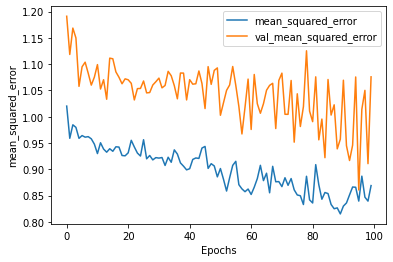

In [17]:
plot_history(history1, 'mean_squared_error')

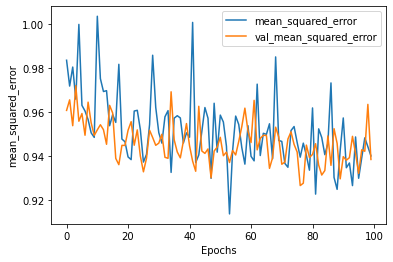

In [18]:
plot_history(history2, 'mean_squared_error')

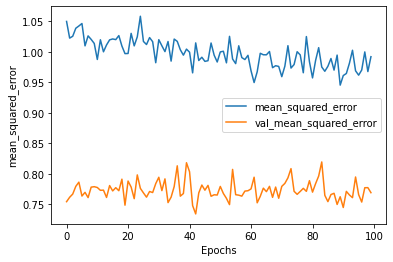

In [19]:
plot_history(history3, 'mean_squared_error')

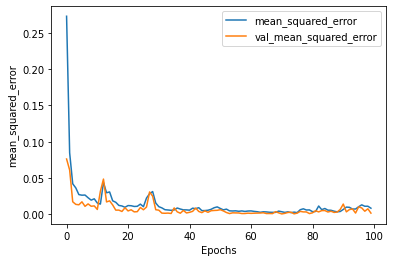

In [20]:
plot_history(history4, 'mean_squared_error')

In [21]:
X_test

,Frequency,Max_Deflection,Average_Deflection,Depth_prediction,L1_prediction,L2_prediction,Mode_prediction
292,1.121715,-0.453758,1.209921,-0.755936,0.160677,-0.124615,0.923834
630,-1.525987,-0.360693,-0.409044,0.004832,0.136415,-0.085696,-1.497995
1200,-1.534324,-0.353902,0.252390,-0.023455,0.242941,-0.307846,-1.505687
113,1.248675,-0.440175,0.304516,-0.278459,0.153984,-0.209034,1.448771
174,-1.521114,-0.356920,-0.814267,0.046081,-0.134354,0.001453,-1.496617
...,...,...,...,...,...,...,...
381,0.192005,2.228778,1.802571,0.086600,0.012259,-0.152585,0.290413
1019,1.233511,-0.437660,-1.321928,-0.196312,-0.140330,0.477468,1.446501
363,0.190038,2.225509,1.228052,0.172410,-0.117738,0.330043,0.288185
594,-1.521825,-0.358681,-0.525421,0.014054,0.096492,-0.047822,-1.495824
